**002step slect training cells(necessary but not important):Each city randomly selects at least one of the indicators average value is at the same time in May and June of the top 25% of the 11,000 cells.If the number of training cells in some prefectures and cities does not reach 11,000, directly take the maximum number of cells that meet the conditions.After cleaning, all the cells are directly 7 days_shift submitted to get a result of 0.3182(mape)**

**002step is generation of top 25% and the top 50% cells,003step is choose 11000 cells from top 25% cells from 002step.All use time is less than 3 minutes.**

**选择训练小区部分（必要但不重要）1.每个地市随机提取至少其中一项指标平均值同时是5月与6月的指标前25%的11000个小区。部分地市训练小区数达不到11000的直接取满足条件的最大小区数目。清洗后的全量小区直接平移7天提交即可得到MAPE 0.3182的结果。**

**step 002是筛选同时是5月与6月的指标前25%及50%的小区部分，step 003是从前25%中筛选11000个小区部分，总共花费时间不超过3分钟。**

In [ ]:
import pandas as pd
import os
import pickle
import random
import datetime

In [ ]:
start_time = datetime.datetime.now()
log_str = 'start_time is {}'.format(start_time)
print(log_str)

**the start time of code running**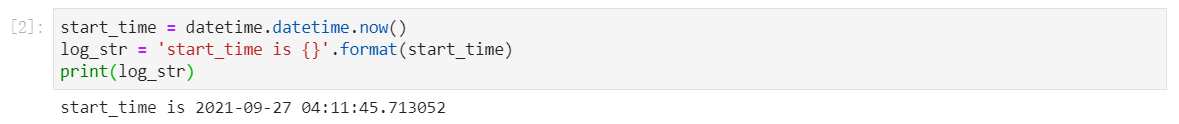

In [ ]:
city_list = ['C48FDFBFC4072E0E','AFE97F546A10368F','EA5EAA705108BDA0','F37F452354AC87C9']
month_list = [5,6]
limit_list = ["50%","75%"]
all_data_columns = {'4g':['上行利用率PUSCH','下行利用率PDSCH', '有效RRC连接平均数', '下行流量', '上行流量', '下行利用率PDCCH'],
                    '5g':['上行利用率PUSCH','下行利用率PDSCH', '有数据传输的RRC数', '下行流量', '上行流量', '下行利用率PDCCH']}

In [ ]:
select_cell_dict = {'4g':{"50%":{},"75%":{}},'5g':{"50%":{},"75%":{}}}
for net in ['4g','5g']:
    data_columns = all_data_columns[net]
    for city in city_list:
        sub_city_cell_dict = {month_list[0]:{"50%":{},"75%":{}},month_list[1]:{"50%":{},"75%":{}}}
        for month in month_list:
            in_file = "./Datasets_new_IQR_100/{}_pm_20210{}_{}.pic".format(net,month,city)
            file=open(in_file,'rb')
            df = pickle.load(file)
            file.close()
            df_m= df.groupby("UserLabel").mean()[data_columns]
            select_df_describe = df_m.describe()
            for limit in limit_list:
                for data_column in data_columns:
                    try:
                        g_select_condition = (g_select_condition | (df_m[data_column] > select_df_describe.loc[limit,data_column]))
                    except:
                        g_select_condition = df_m[data_column] > select_df_describe.loc[limit,data_column]
                sub_city_cell_dict[month][limit] = set(df_m.loc[g_select_condition].index)
                del(g_select_condition)
        for limit in limit_list:
            select_cell_dict[net][limit][city] =  list(sub_city_cell_dict[month_list[0]][limit] & sub_city_cell_dict[month_list[1]][limit])
            print( "{}_{}_{}：{}".format(net,city,limit,len( select_cell_dict[net][limit][city])))

In [ ]:
out_file = "./Datasets/select_cell_dict.pic"
file=open(out_file,"wb")
pickle.dump(select_cell_dict,file)
file.close()

In [ ]:
end_time = datetime.datetime.now()
log_str = 'end_time is {}'.format(end_time)
print(log_str)
all_use_time = (end_time - start_time)
log_str = 'all_use_time is {}'.format(all_use_time)
print(log_str)

**the end time of code running and all use time is about 2-3 mins**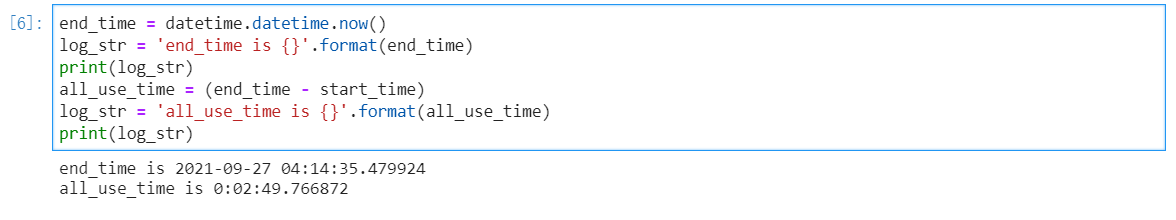